## Import Statements

In [10]:
import pandas as pd
import math
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Reading the data file

In [11]:
sbp_csv = pd.read_csv("/home/user/Downloads/Ex03_SystolicBP_Regreesion.csv")
sbp_csv.head()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
0,45,1,0,2,2,99.149109,1.680932,35.090422,117.280944
1,62,1,1,4,1,76.609814,1.509772,33.609452,127.346514
2,61,1,0,2,2,72.619743,1.692017,25.365606,122.021401
3,51,1,0,3,2,73.858286,1.604062,28.704958,117.430179
4,42,1,0,2,1,83.861856,1.648855,30.846062,112.765810


## Correlation

In [12]:
sbp_csv.corr()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
Age,1.000000,-0.072606,0.075297,0.004664,-0.114006,-0.028380,0.151895,-0.126357,0.669539
Treated,-0.072606,1.000000,0.050122,-0.052271,-0.117269,-0.006899,-0.069158,0.033868,0.476901
Gender,0.075297,0.050122,1.000000,-0.152274,-0.004839,-0.003728,-0.002139,-0.007238,0.083053
FamilySize,0.004664,-0.052271,-0.152274,1.000000,0.071975,-0.038084,-0.178930,0.088567,0.020711
Diet,-0.114006,-0.117269,-0.004839,0.071975,1.000000,0.214507,-0.030904,0.150477,-0.071370
Weight,-0.028380,-0.006899,-0.003728,-0.038084,0.214507,1.000000,-0.100371,0.725423,0.361718
Height,0.151895,-0.069158,-0.002139,-0.178930,-0.030904,-0.100371,1.000000,-0.746394,-0.307311
ScaledBMI,-0.126357,0.033868,-0.007238,0.088567,0.150477,0.725423,-0.746394,1.000000,0.447285
SystolicBP,0.669539,0.476901,0.083053,0.020711,-0.071370,0.361718,-0.307311,0.447285,1.000000


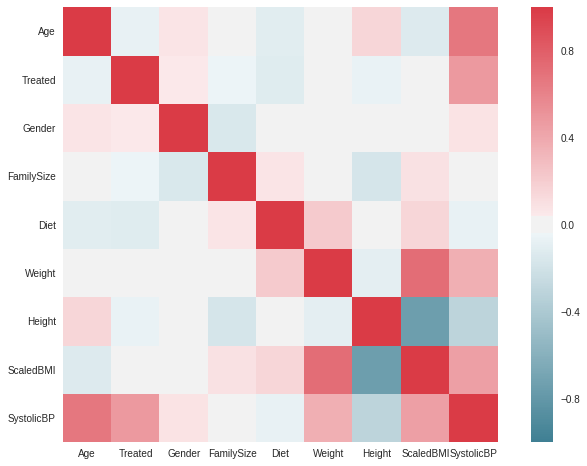

In [13]:
f, ax = plt.subplots(figsize=(12, 8))
corr = sbp_csv.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## Scatter plots regressors vs regressand

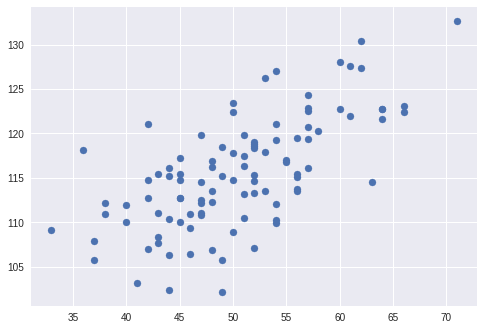

In [14]:
plt.scatter(sbp_csv.Age, sbp_csv.SystolicBP)
plt.show()

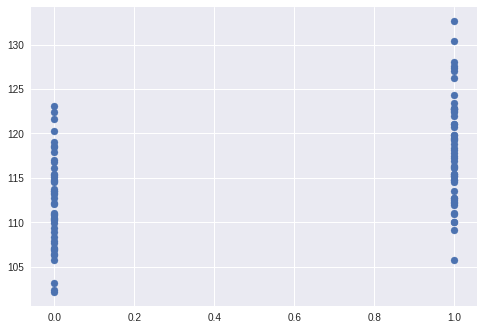

In [15]:
plt.scatter(sbp_csv.Treated, sbp_csv.SystolicBP)
plt.show()

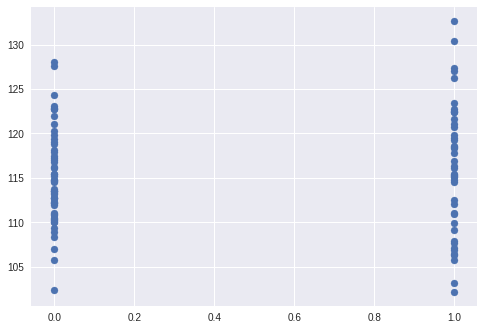

In [16]:
plt.scatter(sbp_csv.Gender, sbp_csv.SystolicBP)
plt.show()

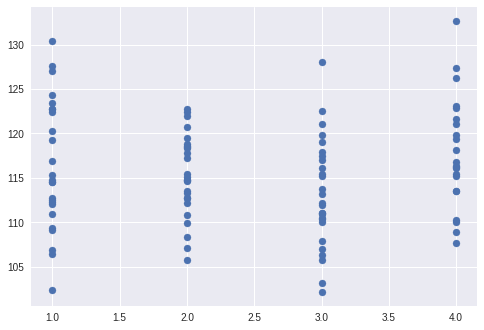

In [17]:
plt.scatter(sbp_csv.FamilySize, sbp_csv.SystolicBP)
plt.show()

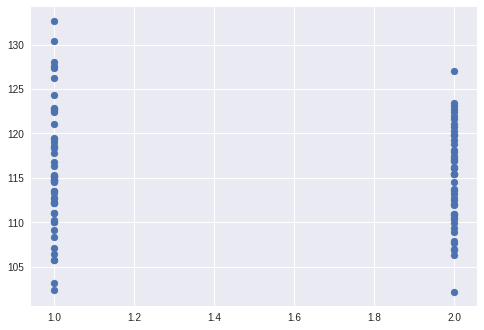

In [18]:
plt.scatter(sbp_csv.Diet, sbp_csv.SystolicBP)
plt.show()

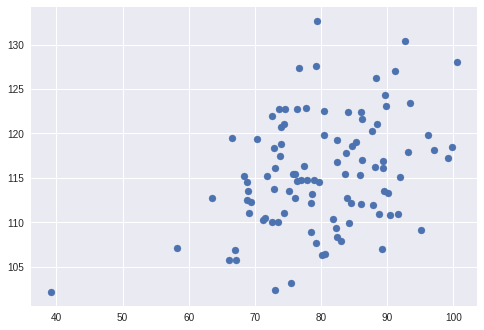

In [19]:
plt.scatter(sbp_csv.Weight, sbp_csv.SystolicBP)
plt.show()

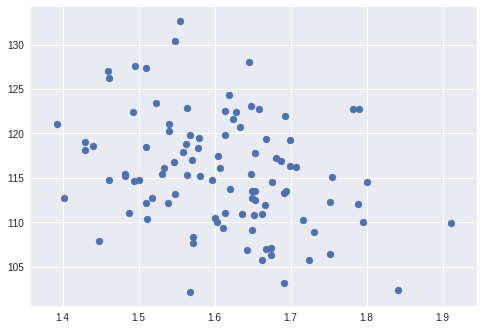

In [20]:
plt.scatter(sbp_csv.Height, sbp_csv.SystolicBP)
plt.show()

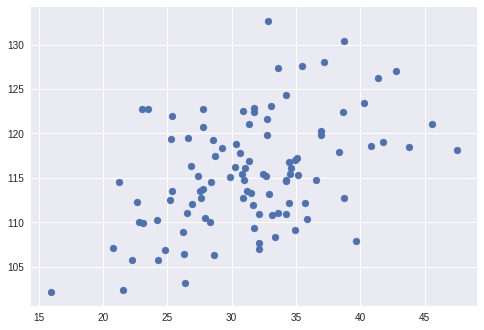

In [21]:
plt.scatter(sbp_csv.ScaledBMI, sbp_csv.SystolicBP)
plt.show()

## Making Train and Test Datasets

In [22]:
sbp_data_y = sbp_csv['SystolicBP']
sbp_data_x = sbp_csv.drop(['SystolicBP'], axis=1)

In [27]:
sbp_data_x_train = sbp_data_x[:int(0.6*len(sbp_data_x))]
sbp_data_y_train = sbp_data_y[:int(0.6*len(sbp_data_y))]
sbp_data_x_test = sbp_data_x[int(0.6*len(sbp_data_x)):]
sbp_data_y_test = sbp_data_y[int(0.6*len(sbp_data_y)):]

## Standardising the data

In [28]:
sbp_data_stan_x_train = (sbp_data_x_train-sbp_data_x_train.mean())/sbp_data_x_train.std()
sbp_data_stan_x_test = (sbp_data_x_test-sbp_data_x_test.mean())/sbp_data_x_test.std()
sbp_data_stan_y_train = (sbp_data_y_train-sbp_data_y_train.mean())/sbp_data_y_train.std()

## Linear Regression Model

In [29]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit (sbp_data_stan_x_train, sbp_data_stan_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [30]:
tr_coeffs = reg.coef_
tr_resi = reg.residues_
tr_intr = reg.intercept_
print("Coeffs: ", tr_coeffs)
print("Residuals: ", tr_resi)
print("Intercept: ", tr_intr)

Coeffs:  [  8.17875384e-01   5.13333249e-01   2.11308519e-03   4.08863646e-04
  -2.21611683e-03   1.44312255e-02  -2.56952828e-03   5.25581782e-01]
Residuals:  0.0154768007293
Intercept:  -2.39283323191e-15


/home/user/myenv2/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
pred_lin = reg.predict(sbp_data_stan_x_test)

In [32]:
pred_lin = (pred_lin*sbp_data_y_test.std())+sbp_data_y_test.mean()

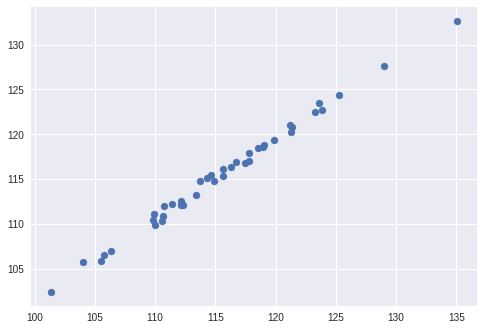

In [33]:
plt.scatter(pred_lin, sbp_data_y_test)
plt.show()

In [34]:
errors_abs = np.abs(pred_lin - sbp_data_y_test)
errors = pred_lin - sbp_data_y_test

In [35]:
errors.mean()

-5.3290705182007514e-15

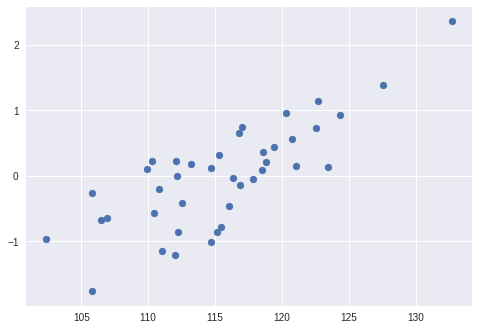

In [36]:
plt.scatter(sbp_data_y_test, errors)
plt.show()

## Lasso Model

In [37]:
alphas = np.linspace(0.0001,0.5,1000)*0.5

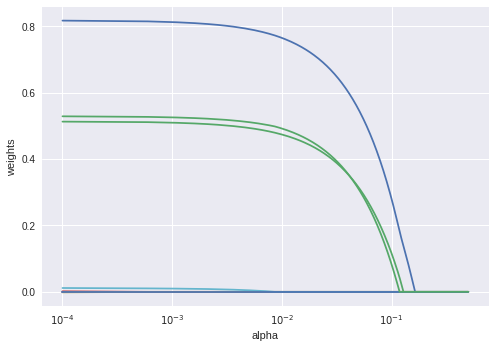

In [38]:
lasso = linear_model.Lasso(max_iter = 10000, normalize=True)
coeffs = []
for al in alphas:
    lasso.set_params(alpha=al)
    lasso.fit(np.array(sbp_data_stan_x_train), np.array(sbp_data_stan_y_train))
    coeffs.append(lasso.coef_)
ax = plt.gca()
ax.plot(2*alphas, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [39]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(np.array(sbp_data_stan_x_train), np.array(sbp_data_stan_y_train))
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(np.array(sbp_data_stan_x_train), np.array(sbp_data_stan_y_train))
pred = lasso.predict(sbp_data_stan_x_test)
mean_squared_error(sbp_data_y_test, (pred*sbp_data_y_test.std())+sbp_data_y_test.mean())

0.59254898201153161

In [40]:
print(pd.Series(lasso.coef_, index=sbp_data_stan_x_test.columns))
print("Intercept: ", lasso.intercept_)
print("Aplha: ", lasso.alpha)

Age           0.816114
Treated       0.512123
Gender        0.000740
FamilySize   -0.000000
Diet         -0.000618
Weight        0.010864
Height       -0.000000
ScaledBMI     0.527985
dtype: float64
Intercept:  -2.39393396248e-15
Aplha:  0.000188560396999


In [41]:
pred_lasso = lasso.predict(sbp_data_stan_x_test)

In [42]:
pred_lasso = (pred_lasso*sbp_data_y_test.std())+sbp_data_y_test.mean()

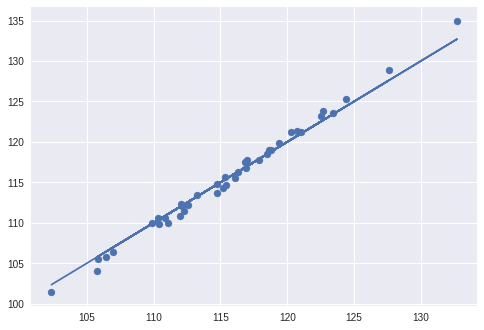

In [43]:
plt.scatter(sbp_data_y_test, pred_lasso)
plt.plot(sbp_data_y_test, sbp_data_y_test)
plt.show()

In [44]:
errors_abs = np.abs(pred_lasso-np.array(sbp_data_y_test))
errors = pred_lasso.reshape(40,1)-np.array(sbp_data_y_test).reshape(40,1)

In [45]:
errors.mean()

-5.6843418860808018e-15

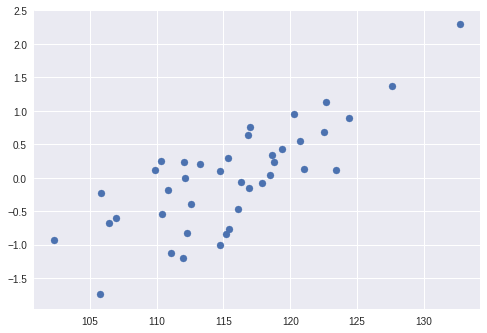

In [46]:
plt.scatter(np.array(sbp_data_y_test).reshape(40,1), errors)
plt.show()

## Histogram of Errors

In [47]:
y = pd.DataFrame(errors)

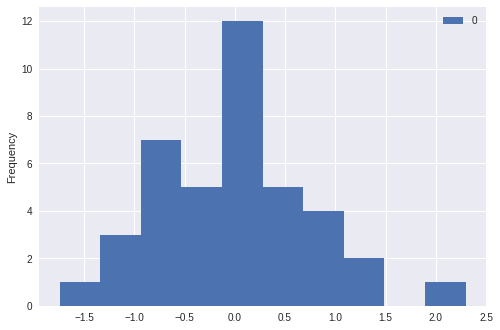

In [48]:
y.plot(kind = 'hist')
plt.show()

## Box Plot

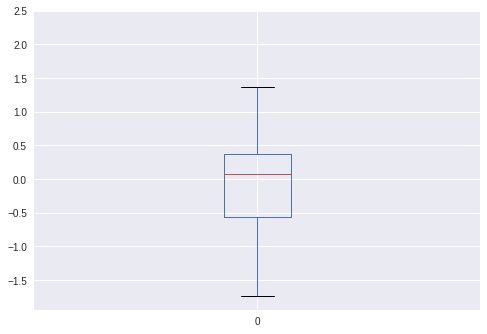

In [49]:
y.plot(kind = 'box')
plt.show()